Ce projet cherche à prédire la température critique d’un super-conducteur en utilisant 81 variables explicatives.

Uploading data...

In [1]:
import pandas as pd

url = "./data_train.csv"
df = pd.read_csv(url, header=None, )
df.drop(columns=[0], inplace=True)

df.columns = ["number_of_elements","mean_atomic_mass","wtd_mean_atomic_mass","gmean_atomic_mass","wtd_gmean_atomic_mass","entropy_atomic_mass","wtd_entropy_atomic_mass","range_atomic_mass","wtd_range_atomic_mass","std_atomic_mass","wtd_std_atomic_mass","mean_fie","wtd_mean_fie","gmean_fie","wtd_gmean_fie","entropy_fie","wtd_entropy_fie","range_fie","wtd_range_fie","std_fie","wtd_std_fie","mean_atomic_radius","wtd_mean_atomic_radius","gmean_atomic_radius","wtd_gmean_atomic_radius","entropy_atomic_radius","wtd_entropy_atomic_radius","range_atomic_radius","wtd_range_atomic_radius","std_atomic_radius","wtd_std_atomic_radius","mean_Density","wtd_mean_Density","gmean_Density","wtd_gmean_Density","entropy_Density","wtd_entropy_Density","range_Density","wtd_range_Density","std_Density","wtd_std_Density","mean_ElectronAffinity","wtd_mean_ElectronAffinity","gmean_ElectronAffinity","wtd_gmean_ElectronAffinity","entropy_ElectronAffinity","wtd_entropy_ElectronAffinity","range_ElectronAffinity","wtd_range_ElectronAffinity","std_ElectronAffinity","wtd_std_ElectronAffinity","mean_FusionHeat","wtd_mean_FusionHeat","gmean_FusionHeat","wtd_gmean_FusionHeat","entropy_FusionHeat","wtd_entropy_FusionHeat","range_FusionHeat","wtd_range_FusionHeat","std_FusionHeat","wtd_std_FusionHeat","mean_ThermalConductivity","wtd_mean_ThermalConductivity","gmean_ThermalConductivity","wtd_gmean_ThermalConductivity","entropy_ThermalConductivity","wtd_entropy_ThermalConductivity","range_ThermalConductivity","wtd_range_ThermalConductivity","std_ThermalConductivity","wtd_std_ThermalConductivity","mean_Valence","wtd_mean_Valence","gmean_Valence","wtd_gmean_Valence","entropy_Valence","wtd_entropy_Valence","range_Valence","wtd_range_Valence","std_Valence","wtd_std_Valence","critical_temp"]

df.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


Visualize Numerical Variables


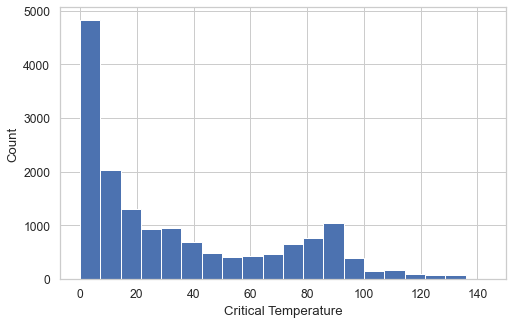

In [4]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['critical_temp'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Critical Temperature', ylabel='Count');

The graph shows that the majority of superconductors have critical temperature between 0 and 10 degree Celsius.

Data Preparation for PCA


In [43]:
from sklearn.preprocessing import StandardScaler
vars = df.columns.tolist()
vars.remove('critical_temp')

x = df.loc[:,vars]
y = df.loc[:,'critical_temp']

x = StandardScaler().fit_transform(x)
print(x.shape)

In [1]:
from sklearn.decomposition import PCA
for i in range(100):
    N = i
    pca = PCA(n_components=N)
    principalComponents = pca.fit_transform(x)
    if(sum(principalComponents.explained_variance_ratio_) >= 0.99):
        print("Minimum Componenet's number to keep 99% of the variance is: " + str(N))
        break

principalDf = pd.DataFrame(data = principalComponents 
                            , columns = ['P' + str(i) for i in range(1,i+1)])
principalDf.head

NameError: name 'x' is not defined